## Import packages

In [109]:
from sentence_transformers import SentenceTransformer

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## Import Model

In [97]:
embedd_model = "all-MiniLM-L6-v2"
model = SentenceTransformer(embedd_model)


In [98]:
label_encoder = LabelEncoder()
svm_model = SVC(kernel = "linear", probability = True)

## Split data

In [99]:
df = pd.read_csv("intent_dataset.csv") # data genereated by ChatGPR
df.head()

,text,intent
0,hello,greeting
1,hi,greeting
2,hey,greeting
3,hey there,greeting
4,hello there,greeting


In [100]:
texts = df['text']
labels = df['intent']

In [101]:
text_embedd = model.encode(texts)
label_encode = label_encoder.fit_transform(labels)

In [102]:
text_train, text_test, label_train, label_test = train_test_split(
    text_embedd,
    label_encode,
    test_size = 0.25,
    shuffle = True, # Data doesn't shuffle all are in contigues way one label after other label starts
    random_state = 42
)

In [103]:
text_test

array([[-0.00713093, -0.05330056,  0.01255493, ...,  0.00786299,
         0.01864926,  0.0926543 ],
       [-0.07308444,  0.05861787,  0.04157332, ..., -0.02787952,
        -0.01495866,  0.09360653],
       [-0.03516369,  0.07937562,  0.0609321 , ...,  0.02566168,
         0.06446908,  0.050499  ],
       ...,
       [-0.03114098,  0.1115841 , -0.01947013, ...,  0.01608139,
         0.02048476,  0.08497537],
       [ 0.02744991, -0.00273062,  0.04899343, ...,  0.00789832,
        -0.01057527,  0.0964502 ],
       [ 0.03192726,  0.0186341 ,  0.0196215 , ...,  0.03364253,
         0.03665582,  0.10155046]], shape=(236, 384), dtype=float32)

In [104]:
label_test

array([ 8,  9, 16, 14, 19,  7, 22,  7, 19,  7, 21, 13,  7, 19, 18,  1, 19,
       13,  5, 14,  1, 21,  5,  8, 19, 13, 15, 17,  6, 20, 18,  8, 19, 14,
       12, 19,  3, 22,  3,  6, 20, 19,  7, 18, 18, 20, 13, 14, 16,  4, 23,
        8,  6, 24,  5, 10, 23, 11, 23, 12,  4, 15, 11, 19, 21,  7, 19, 20,
       14,  7, 16, 10,  6, 23, 12, 24,  5,  0, 20, 16,  2, 14, 21, 19,  1,
       19,  9,  9, 24,  1, 10,  8, 23, 15,  8,  1,  9, 10, 14,  8, 15,  9,
       20,  8,  4, 19,  8, 20, 16, 21,  1, 17, 19, 12,  9, 15, 12,  7,  1,
       10,  9, 17, 21,  7,  4, 21, 18, 18,  1, 16, 22, 10, 21, 16,  8, 14,
       13,  8, 18,  8, 20, 18, 24, 23,  5,  4,  7, 24,  0, 19, 24,  5, 24,
       18,  9,  7, 13, 19, 18,  2,  3, 23, 13, 15, 13, 21,  1, 11, 19,  4,
       11,  8,  5, 17,  0,  6, 23,  4, 19, 19,  2, 17,  0,  7,  1, 18, 19,
       10, 20, 19,  8,  6,  9,  8, 19, 19,  4, 23, 22, 19, 19,  0,  2,  8,
       23, 19,  2,  1,  8,  9, 17, 15,  2, 19, 19, 19, 14,  8, 16, 12, 13,
       18,  8,  2, 19, 19

## Train/Test the model

In [105]:
svm_model.fit(
    text_train,
    label_train
)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [106]:
y_pred_test = svm_model.predict(text_test)
y_pred_train = svm_model.predict(text_train)
print(f"Accuracy_for_testing_data: {accuracy_score(label_test, y_pred_test):.2%}")
print(f"Accuracy_for_training_data: {accuracy_score(label_train, y_pred_train):.2%}")

Accuracy_for_testing_data: 94.49%
Accuracy_for_training_data: 97.30%


In [107]:
print(classification_report(label_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.92      1.00      0.96        11
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       0.90      0.75      0.82        12
           8       1.00      0.84      0.91        19
           9       1.00      0.82      0.90        11
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         7
          16       0.89      1.00      0.94         8
          17       1.00    

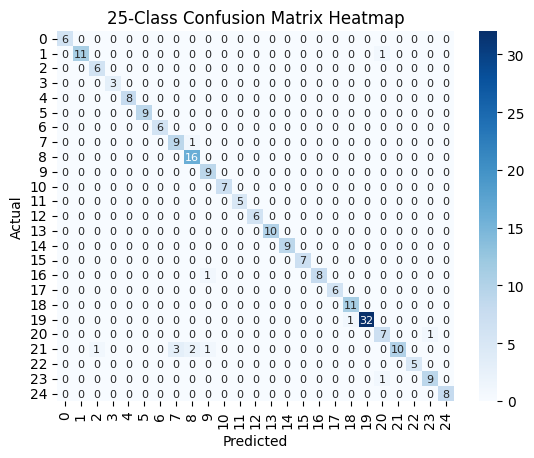

In [167]:
cm = confusion_matrix(y_pred_test, label_test)
sns.heatmap(
    cm, 
    annot=True,
    fmt='d',
    cmap = 'Blues',
    annot_kws={"size": 8}
    )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('25-Class Confusion Matrix Heatmap')
plt.show()